In [5]:
import gc
gc.collect()

import numpy as np

from scipy.fft import fft as scipy_fft
from numpy.fft import fft as numpy_fft

import timeit
import json


def generate_signal(size):
    np.random.seed(0)
    x = np.linspace(0, size, size**2)
    return x.astype(np.float32)


def compute_fft_numpy(size):
    signal = generate_signal(size)
    
    # Define FFT and IFFT functions
    #scipy_fft_func, scipy_ifft_func = scipy_fft2, scipy_ifft2



    #scipy_fft_time = timeit.timeit(lambda: scipy_fft_func(signal), number=10)



    numpy_fft_time = timeit.timeit(lambda: numpy_fft(signal), number=10)


    # Convert numpy array to TensorFlow tenso

    return {
        #'scipy_fft_time': scipy_fft_time, 
        'numpy_fft_time': numpy_fft_time, 
    }
    
sizes = [2**i for i in range(5, 14)]

results = {
    #'scipy_fft_time': [],
    'numpy_fft_time': [],

}

for size in sizes:
    print(f"Processing size: {size}")
    result = compute_fft_numpy(size)
    for key in result:
        results[key].append(result[key])
    print(f"Completed size: {size}")

# Save the results to a JSON file
with open('fft_results_numpy.json', 'w') as f:
    results_copy = {k: [float(x) for x in v] for k, v in results.items()}
    results_copy['sizes'] = sizes
    json.dump(results_copy, f, indent=4)
    print("Results saved to fft_results.json")

Processing size: 32
Completed size: 32
Processing size: 64
Completed size: 64
Processing size: 128
Completed size: 128
Processing size: 256
Completed size: 256
Processing size: 512
Completed size: 512
Processing size: 1024
Completed size: 1024
Processing size: 2048
Completed size: 2048
Processing size: 4096
Completed size: 4096
Processing size: 8192
Completed size: 8192
Results saved to fft_results.json


In [4]:
import gc
gc.collect()

import numpy as np

from scipy.fft import fft as scipy_fft
from numpy.fft import fft as numpy_fft

import timeit
import json


def generate_signal(size):
    np.random.seed(0)
    x = np.linspace(0, size, size**2)
    return x.astype(np.float32)


def compute_fft_scipy(size):
    signal = generate_signal(size)

    scipy_fft_time = timeit.timeit(lambda: scipy_fft(signal), number=10)




    return {
        'scipy_fft_time': scipy_fft_time, 
        #'numpy_fft_time': numpy_fft_time, 
    }
    
sizes = [2**i for i in range(5, 14)]

results = {
    'scipy_fft_time': [],
    #'numpy_fft_time': [],

}

for size in sizes:
    print(f"Processing size: {size}")
    result = compute_fft_scipy(size)
    for key in result:
        results[key].append(result[key])
    print(f"Completed size: {size}")

# Save the results to a JSON file
with open('fft_results_scipy.json', 'w') as f:
    results_copy = {k: [float(x) for x in v] for k, v in results.items()}
    results_copy['sizes'] = sizes
    json.dump(results_copy, f, indent=4)
    print("Results saved to fft_results.json")

Processing size: 32
Completed size: 32
Processing size: 64
Completed size: 64
Processing size: 128
Completed size: 128
Processing size: 256
Completed size: 256
Processing size: 512
Completed size: 512
Processing size: 1024
Completed size: 1024
Processing size: 2048
Completed size: 2048
Processing size: 4096
Completed size: 4096
Processing size: 8192
Completed size: 8192
Results saved to fft_results.json


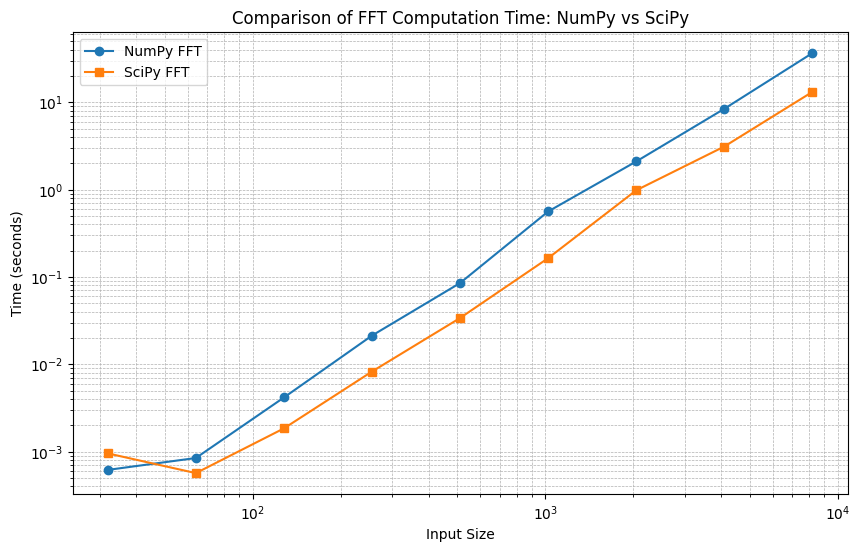

In [6]:
#plotting and comparing 

import json
import matplotlib.pyplot as plt

# Load data from JSON files
with open("fft_results_numpy.json", "r") as f:
    numpy_data = json.load(f)

with open("fft_results_scipy.json", "r") as f:
    scipy_data = json.load(f)

# Extract sizes and times
sizes = numpy_data["sizes"]
numpy_fft_time = numpy_data["numpy_fft_time"]
scipy_fft_time = scipy_data["scipy_fft_time"]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, numpy_fft_time, label="NumPy FFT", marker="o")
plt.plot(sizes, scipy_fft_time, label="SciPy FFT", marker="s")

plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title("Comparison of FFT Computation Time: NumPy vs SciPy")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()
